<a href="https://colab.research.google.com/github/sumusa/TCRT_Internship/blob/master/TCRT_Section5_ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('../datasets/02_salary_workers.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
#Select the required columns

# remember X is the independent variable
X = dataset.iloc[:, :-1].values #except the last column

#dependnet varable
y = dataset.iloc[:, 1].values

In [ ]:
#look at the data
#X
y #y is a vector

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [ ]:
# fit the SLR model to the training set
from sklearn.linear_model import LinearRegression

#make an object called regressor (or anything you want)
regressor = LinearRegression()

In [ ]:
#use the fit method to fit the regressor to the trainng set
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# Predict on the test set
# we will have a vector of predictions
y_pred = regressor.predict(X_test)
y_pred

array([ 55870.35248488, 124217.47107547,  53061.56678938, 114854.85209045,
        55870.35248488, 115791.11398896,  63360.44767289,  92384.56652643,
        63360.44767289, 102683.44740994])

In [ ]:
#compare actual versus predicted
print(y_test)
print(y_pred)

[ 54445. 121872.  56642. 116969.  64445. 112635.  56957.  98273.  55794.
 113812.]
[ 55870.35248488 124217.47107547  53061.56678938 114854.85209045
  55870.35248488 115791.11398896  63360.44767289  92384.56652643
  63360.44767289 102683.44740994]


## Visualize the results

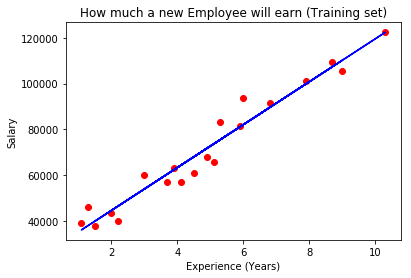

In [ ]:
# Visualising the Training set results
# scatter plot
plt.scatter(X_train, y_train, color = 'red')

# for line plot (look at the plot function)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('How much a new Employee will earn (Training set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()

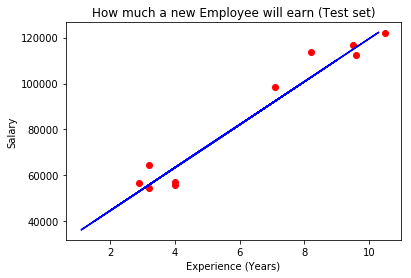

In [ ]:
#how does it perform on the test set

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red') #the test set
plt.plot(X_train, regressor.predict(X_train), color = 'blue') #same blue line as the previous plot
plt.title('How much a new Employee will earn (Test set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()

#looks like it did a good job!

# Multiple linear Regression

In [ ]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
# Importing the dataset
#

#### Goal: Predict the profit based on other information
dataset = pd.read_csv('../datasets/03_UKCompanies.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values




In [ ]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


In [ ]:
X[0]

array([0.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
       1.368978e+05, 4.717841e+05])

In [ ]:
# Avoiding the Dummy Variable Trap
## here we avaoided the first column of X. We started from index 1
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




In [ ]:

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred #compare with the observations

array([103615.70496732, 132245.69745432, 133070.23906339,  72592.46097845,
       179075.96157176, 116014.3380813 ,  67853.79186105,  98837.47482921,
       114480.26282341, 168492.58649243])

In [ ]:
# Homework A: Plot the results

## Backward Elimination

Were all the variables chosen initially statistically significant? We will find out in our next lecture